In [1]:
import numpy as np

In [9]:
#Solución para la ecuación de transporte con flujo en estado estacionario
#Utilizando diferencias finitas centradas en el tiempo, con el método de 
#Crank Nicolson.
q = 1
porosidad = 0.4
vz = q/porosidad #cm/d
R = 1
dt = 0.1#dia
dz = 1 #cm
D = .5
L = 5
T = 1
dominio = np.linspace(0,5,6)
#Condiciones iniciales
condicion = np.zeros(L+1)
condicion[0] = 60
frontera = 60

In [10]:
a = -( D * dt)/(2 * dz**2)
b = (vz * dt)/( 4 * dz)
## tamaño del dominio
#pasos de tiempo

#Caso primer paso de tiempo
print(a,b)


-0.05 0.0625


In [26]:
2*a+1

0.9

In [11]:
incognitas = L

In [29]:
soluciones = [list(condicion)]

for t in range(T):
    matriz = np.zeros((incognitas, incognitas))
    vector = np.zeros(incognitas)
    for x in range(L):
        if x == 0:
            matriz[x,x] = 1 + 2*a
            matriz[x,x+1] = -a + b
                
            vector[x] =  (a+b)*condicion[x] + (1-2*a)*condicion[x+1] + (a-b)*condicion[x+2] + (a+b)*frontera 
                
        elif 0 < x < L-1:
            matriz[x,x+1] = -(a-b)
            matriz[x,x] = 1 + 2*a
            matriz[x,x-1] = -(a+b)
                
            vector[x] = (a+b)*condicion[x] + (1-2*a)*condicion[x+1] + (a-b)*condicion[x+2]
        
        elif x == L-1:
            matriz[x,x-1] = -(a+b)
            matriz[x,x] = 1+a+b
                
            vector[x] = (a+b)*condicion[x] * (1-a-b)*condicion[x+1]
    
    #sol = np.linalg.solve(matriz, vector)
    #condicion[1:] = sol[:]
    #soluciones.append(list(condicion))

In [31]:
matriz

array([[ 0.9   ,  0.1125,  0.    ,  0.    ,  0.    ],
       [-0.0125,  0.9   ,  0.1125,  0.    ,  0.    ],
       [ 0.    , -0.0125,  0.9   ,  0.1125,  0.    ],
       [ 0.    ,  0.    , -0.0125,  0.9   ,  0.1125],
       [ 0.    ,  0.    ,  0.    , -0.0125,  1.0125]])

In [32]:
vector[0]

1.4999999999999996

In [33]:
np.linalg.solve(matriz, vector)

array([1.66378315e+00, 2.30681198e-02, 3.19836137e-04, 4.43532394e-06,
       5.47570857e-08])

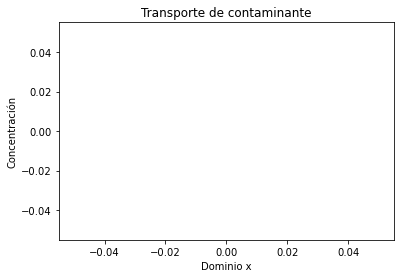

In [372]:


fig, ax = plt.subplots()
xdata, ydata = dominio , condicion
ax.set(xlabel = 'Dominio x', ylabel = 'Concentración',
       title='Transporte de contaminante') 
ln, = plt.plot([], [])


def init():
    ax.set_xlim(0, L+1)
    ax.set_ylim(0, frontera*1.5)
    return ln,

def update(paso):
    print(paso)
    xdata = dominio  
    ydata = paso[:]
    ln.set_data(xdata, ydata)
    return ln,

In [373]:
ani = FuncAnimation(fig, update, soluciones ,
                    init_func=init, blit=True, repeat= True)
plt.show()